In [1]:
import os
import sys
sys.path.append(os.path.expanduser("~"))
from camel_dataloader import get_astro_data,get_astro_data_2D_from_3D
from utils import draw_figure, compute_pk, plot_residual
from UNet_apply import applyCNN, applyCNN_TF
import comet_ml
import torch
from torch import nn
from torch.nn.functional import mse_loss, l1_loss
import torch.nn as nn
import torch.nn.functional as F
import torch.fft as fft
from torch import autograd, Tensor
from lightning.pytorch import LightningModule, Trainer, seed_everything
from lightning.pytorch.loggers import CometLogger
from lightning.pytorch.callbacks import LearningRateMonitor, ModelCheckpoint
from typing import Optional, Tuple
from torch.special import expm1
from tqdm import trange
from torch.distributions.normal import Normal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import Pk_library as PKL

device = torch.device("cuda") if torch.cuda.is_available() else "mps"
print(device)
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom', colors)

vmin = -2.0
vmax = 2.0


[rank: 0] Seed set to 7


cuda
cuda


In [2]:
import importlib
import UNet_apply
import camel_dataloader
import utils
importlib.reload(UNet_apply) 
importlib.reload(camel_dataloader) 
importlib.reload(utils) 
from camel_dataloader import get_astro_data,get_astro_data_2D_from_3D
from utils import draw_figure, compute_pk, plot_residual
from UNet_apply import applyCNN, applyCNN_TF

[rank: 0] Seed set to 7


cuda


In [4]:
cropsize = 256
batch_size = 12
num_workers = 8
   
dataset = 'Astrid'

In [5]:
dm_CMD = get_astro_data(
        dataset,
        thickness=25/15,
        num_workers=num_workers,
        # resize=cropsize,
        batch_size=batch_size,
    )

# Testing UNet_apply

In [6]:
conditioning, params, target = next(iter(dm_CMD.test_dataloader()))
sample, Mtot = torch.vmap(lambda c, p: applyCNN(c, cond=True, params=p),
    randomness='same')(conditioning.unsqueeze(1), params.unsqueeze(1))

/global/u1/l/lindajin/virtualenvs/env1/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
/global/homes/l/lindajin/UNet_apply.py:482: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We

suite: Astrid


In [7]:
sample.mean(),Mtot.mean()

(tensor(4.9477e-11, grad_fn=<MeanBackward0>),
 tensor(4.1601e+11, grad_fn=<MeanBackward0>))

/global/homes/l/lindajin/utils.py:222: RuntimeWarning: invalid value encountered in log
  im = ax.flat[2].imshow(np.log(sample0+1), cmap='copper', vmin=-2, vmax=5)



Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.00 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.00 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.00 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.00 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.00 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.00 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.01 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.01 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time taken = 0.01 seconds

Computing power spectra of the fields...
Time FFTS = 0.00
Time loop = 0.00
Time t

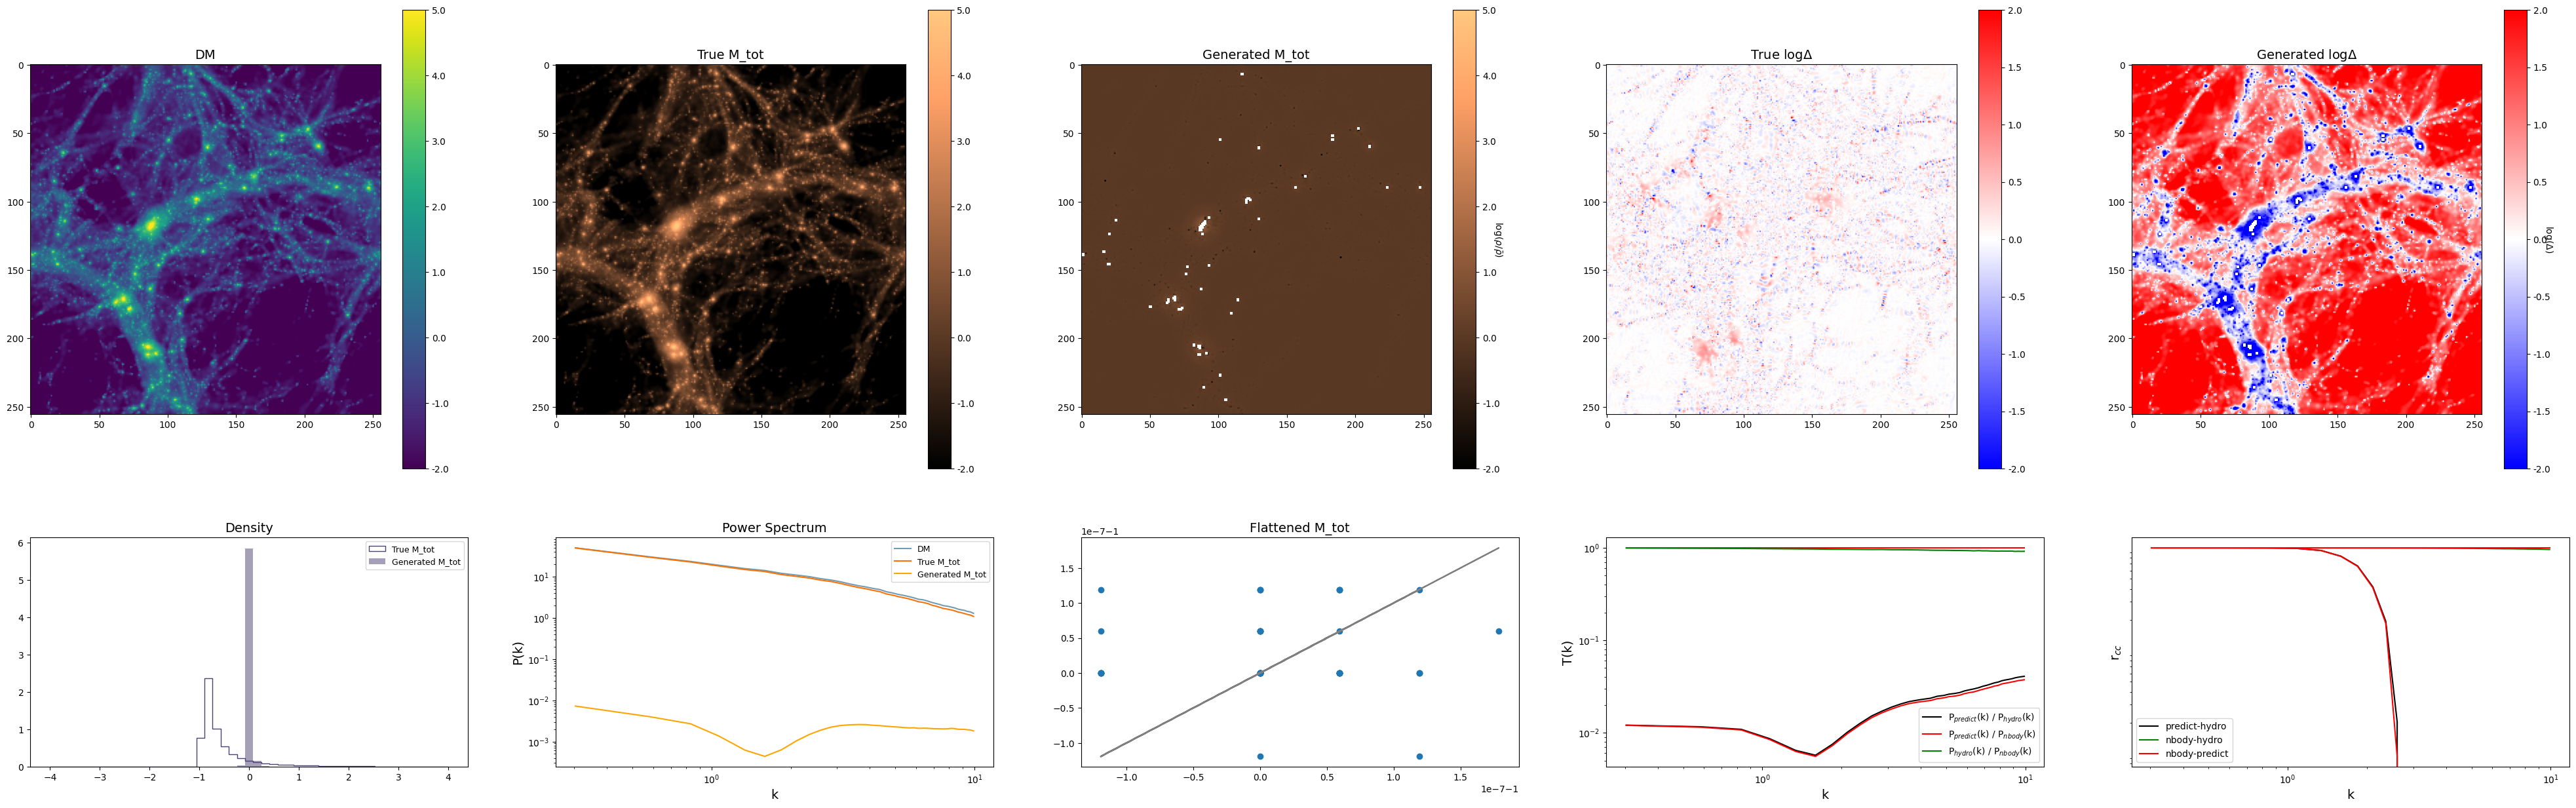

In [8]:
fig = draw_figure(target,sample.unsqueeze(1).detach(),conditioning,'Astrid')